# Este trabajo fue realizado por Luciano Tangorra, utilizando como guia el material brindado por la cátedra de Aprendizaje profundo por refuerzo, de la ECI 2019, y conocimiento previo obtenido en su universidad (UNICEN).

# Jugador aleatorio con _Football_ en Google Colaboratory

Ejemplo de jugador aleatorio para el entorno [_Football_](https://github.com/google-research/football) versión `academy_empty_goal_close`. 

Ejecución en Google Colab: cuaderno completo, incluye instalación de dependencias.

### Añadir repositorio para drivers OpenGL

In [0]:
!add-apt-repository ppa:ubuntu-x-swat/updates
!apt-get dist-upgrade

 Updated versions of X.org drivers, libraries, etc. for Ubuntu.

This PPA is for stable upstream releases of X.org components. If you're looking for something even more bleeding-edge, please see the xorg-edgers PPA.

While Ubuntu does not "officially/formally" support these packages, if you discover problems when installing these debs please feel free to report bugs to launchpad. However, please make sure to clearly state that you are running packages from this PPA so we know the fixes need to come here.

If you are upgrading from one release to another with this PPA activated, please install the ppa-purge package and use it to downgrade everything in here beforehand. sudo ppa-purge ppa:ubuntu-x-swat/updates will do it.

[Directions for packaging drivers can be seen at https://wiki.ubuntu.com/X/DriverBuilding]
 More info: https://launchpad.net/~ubuntu-x-swat/+archive/ubuntu/updates
Press [ENTER] to continue or Ctrl-c to cancel adding it.

Get:1 https://cloud.r-project.org/bin/linux/ubu

### Instalar bibliotecas de sistema

In [0]:
!apt-get install git cmake build-essential libgl1-mesa-dev libsdl2-dev libsdl2-image-dev libsdl2-ttf-dev libsdl2-gfx-dev libboost-all-dev libdirectfb-dev libst-dev mesa-utils xvfb x11vnc libsqlite3-dev glee-dev libsdl-sge-dev python3-pip libosmesa6-dev libgl1-mesa-glx libglfw3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
libboost-all-dev is already the newest version (1.65.1.0ubuntu1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
git is already the newest version (1:2.17.1-1ubuntu0.4).
libgl1-mesa-dev is already the newest version (19.0.8-0ubuntu0~18.04.1).
libgl1-mesa-dev set to manually installed.
The following packages were automatically installed and are no longer required:
  libnvidia-cfg1-418 libnvidia-common-410 linux-headers-4.15.0-55
  linux-headers-4.15.0-55-generic
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  gir1.2-ibus-1.0 lib++dfb-1.7-7 liba52-0.7.4 libcaca-dev libcapnp-0.6.1
  libdbus-1-dev libdirectfb-1.7-7 libglee0d1 libibus-1.0-5 libibus-1.0-dev
  libmirclient-dev libmirclient9 libmircommon-dev libmircommon7
  libmircookie-dev libmircookie2 libmircore-dev libmircore1

### Instalar bibliotecas Python

#### Tensorflow

In [0]:
!pip install tensorflow-gpu

     |████████████████████████████████| 377.0MB 60kB/s 


#### OpenAI baselines

In [0]:
!git clone https://github.com/openai/baselines.git
%cd baselines
!pip install -e .
%cd ..

Cloning into 'baselines'...
remote: Enumerating objects: 3531, done.
remote: Total 3531 (delta 0), reused 0 (delta 0), pack-reused 3531
Receiving objects: 100% (3531/3531), 6.47 MiB | 4.39 MiB/s, done.
Resolving deltas: 100% (2342/2342), done.
/content/baselines
Obtaining file:///content/baselines
  Running setup.py develop for baselines
/content


#### Football

In [0]:
!git clone https://github.com/jgromero/football.git
%cd football
!pip install .[tf_gpu]
%cd ..

Cloning into 'football'...
remote: Enumerating objects: 1028, done.
remote: Counting objects: 100% (1028/1028), done.
remote: Compressing objects: 100% (747/747), done.
remote: Total 1028 (delta 259), reused 1026 (delta 259), pack-reused 0
Receiving objects: 100% (1028/1028), 26.28 MiB | 8.84 MiB/s, done.
Resolving deltas: 100% (259/259), done.
/content/football
Processing /content/football
     |████████████████████████████████| 11.4MB 2.6MB/s 

  Created wheel for gfootball: filename=gfootball-0.2-cp36-cp36m-linux_x86_64.whl size=24534784 sha256=c1d425a86ea004060b005f57347405b7c564c067d488f4f826011e86e66e54c5
  Stored in directory: /tmp/pip-ephem-wheel-cache-0d534r96/wheels/41/ad/ae/8cf1d92b8694b10187e5daf33e8d5c248ffa5437e234ccbbee
Successfully built gfootball
/content


### Test con implementación PPO de OpenAI baselines

In [0]:
# !python3 -m gfootball.examples.run_ppo2 --level=academy_empty_goal_close

### Agente aleatorio

In [0]:
'''import gfootball.env as football_env

env = football_env.create_environment(
    env_name='academy_empty_goal_close', 
    stacked=False,
    representation='simple115',
    with_checkpoints=True,
    render=False)

for i in range(1, 10):
    env.reset()
    acc_reward = 0

    while True:
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        acc_reward += reward 
    
        if done:
            break

    print("Recompensa episodio {:d}: {:.2f}".format(i, acc_reward))

env.close()'''

'import gfootball.env as football_env\n\nenv = football_env.create_environment(\n    env_name=\'academy_empty_goal_close\', \n    stacked=False,\n    representation=\'simple115\',\n    with_checkpoints=True,\n    render=False)\n\nfor i in range(1, 10):\n    env.reset()\n    acc_reward = 0\n\n    while True:\n        action = env.action_space.sample()\n        observation, reward, done, info = env.step(action)\n        acc_reward += reward \n    \n        if done:\n            break\n\n    print("Recompensa episodio {:d}: {:.2f}".format(i, acc_reward))\n\nenv.close()'

# DQN

Instalo las librerias de keras-rl para implementar la DQN

In [0]:
!git clone https://github.com/matthiasplappert/keras-rl.git
%cd /content/keras-rl
!python setup.py install

Cloning into 'keras-rl'...
remote: Enumerating objects: 1715, done.
remote: Total 1715 (delta 0), reused 0 (delta 0), pack-reused 1715
Receiving objects: 100% (1715/1715), 1.37 MiB | 1.54 MiB/s, done.
Resolving deltas: 100% (1066/1066), done.
/content/keras-rl
running install
running bdist_egg
running egg_info
creating keras_rl.egg-info
writing keras_rl.egg-info/PKG-INFO
writing dependency_links to keras_rl.egg-info/dependency_links.txt
writing requirements to keras_rl.egg-info/requires.txt
writing top-level names to keras_rl.egg-info/top_level.txt
writing manifest file 'keras_rl.egg-info/SOURCES.txt'
writing manifest file 'keras_rl.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/rl
copying rl/policy.py -> build/lib/rl
copying rl/util.py -> build/lib/rl
copying rl/callbacks.py -> build/lib/rl
copying rl/__init__.py -> build/lib/rl
copying rl/random.py -> build/lib/rl


Importo las librerias correspondientes

In [0]:
from keras.layers import Dense, Input, Flatten, Dropout
from keras.models import Model
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory

Veo:

           - Estado
           - Accion
           - Rango de recompenza

In [0]:
import gfootball.env as football_env

env = football_env.create_environment(
    env_name='academy_empty_goal_close', 
    stacked=False,
    representation='simple115',
    with_checkpoints=True,
    render=False)

print(env.observation_space)
print(env.action_space)
print(env.action_space.n)
print(env.reward_range)
actions = env.action_space.n

Box(115,)
Discrete(21)
21
(-inf, inf)


# Ahora implemento la DQN con Keras-lr!

## Construyo el modelo (con Keras) que se utilizará en la implementación de la DQN.

El input es de tamaño del state (115) x 3, aplanado (con el flatten), ya que estoy pasando 3 frames de estado a la red para que, ademas de los datos que tiene de cada estado, tenga los datos de los movimientos que se realizan en el juego para aprender mejor peculiaridades que surgen por los movimientos.

La capa flatten es para poner en una sola dimension lo del input y de este modo se pueda conectar con la capa densa.

Capas densas ocultas, con activación relu.

La capa densa final es lineal y tiene ese tam ya que es la salida de la red, la cual representaria el valor Q para cada accion dado el estado de entrada.


Utilizo dropout para mejorar el entrenamiento. Aunque no debería de existir el overfitting ya que cada episodio inicia de manera diferente y por lo tanto se resuelve de otra manera, aplicar dropout beneficio enormemente el entrenamiento de la red. Yo supongo que es porque le da oportunidad a otras neuronas de modificar sus pesos, siendo por ejemplo el caso de que casi siempre que se inicia el episodio el jugador tiene que ir contra un mismo lugar y eso le dificulta generalizar cuando inicia en otra posición o con otro estado muy distinto.

In [0]:
WINDOW_LENGTH = 3

i = Input(shape=(WINDOW_LENGTH,) + env.observation_space.shape)
d = Flatten()(i)
d = Dense(100, activation='relu')(d)
d = Dropout(0.4)(d)
d = Dense(200, activation='relu')(d)
d = Dropout(0.4)(d) #La que salio tdo obien tenia dropout
d = Dense(100, activation='relu')(d)
d = Dense(21, activation='linear')(d)

model = Model(inputs=i, outputs=d)
model.summary()

W0815 14:23:22.701970 140310373406592 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3, 115)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 345)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               34600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 200)               20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               20100     
__________

Se tendrá una politica epsilon greedy con epsilon = 0.1.


Además se utilizará una memoria secuencial, la cual guarda en la memoria cada jugada y luego obtiene un batch, con el cual entrena. Al tener tamaño de ventana 3 significa que voy a proveer a la red de 3 frames seguidos dentro de la memoria para entrenar (relacion directa con el input de la red, el cual tambien es 3), para que tenga una pequeña "pelicula" la cual podrá observar para medir, por ejemplo, la velocidad de la pelota, el movimiento del jugador, entre otras cosas*. El limite representa cuantos steps puede guardar la memoria antes de que se  deban reemplazar los mas viejos para agregar otros nuevos ejemplos.


DQNAgent utiliza el modelo creado anteriormente como Q y Q_target, la cantidad de acciones que puede realizar el agente, el tipo de memoria que va a utilizar, el nb_steps_warmup significa que cantidad de steps se realizan (para agregar jugadas a la mem) antes de iniciar el entrenamiento. En este caso se guardan 10.000 steps a la memoria de jugadas, para luego empezar a entrenar. target_model_update representa que tanto se va a modificar la red target cada vez que se actualice (en este caso se actualiza cada step). La formula utilizada para este update a la red target es: 
        
         (1 - target_model_update) * oldθ + target_model_update * newθ

En caso de aplicar un target_model_update mayor a 1 se copiaran la totalidad de los parámetros de la red Q a la de Q_target cada target_model_update cantidad de steps. policy es la politica que se utiliza para seleccionar la acción a realizar, la cual, como se dijo anteriormente, es e-greedy (e=0.1).


Se utilizará como optimizador Adam con lr de 0.001 y como metrica el mean absolute error (el promedio del error en su valor absoluto).

La idea del lr bajo y de actualizar poco la red target es para que la red no se modifique enormemente por buenas o malas jugadas, ya que puede tener problemas con el checkpoint (contaria como mejor una jugada de acercarse mucho al area enemigo en vez de una de acercarse un poco y pegarle aunque erre por poco, ya que en este ultimo caso es relativamente facil corregir el disparo en otros episodios).


**Esto ya se encuentra incluido en el espacio observado (lo que se le pasa a la red), pero me parecio un buen agregado incluir una ventana de 3 frames para que aprenda mejor los movimientos del juego.*

In [0]:
policy = EpsGreedyQPolicy() # Eps = 0.1 
memory = SequentialMemory(limit=50000, window_length=WINDOW_LENGTH)
dqn = DQNAgent(model=model, nb_actions=actions, memory=memory, nb_steps_warmup=10000, target_model_update=0.02, policy=policy)
dqn.compile(optimizer=Adam(lr=0.001), metrics=['mae'])

# Train!

Entreno al agente por 150.000 steps. Puede parecer poco pero para cumplir la tarea, dada la topología que se tiene, es suficiente.

Tiempo de demora de entrenamiento: 37min.

In [0]:
h_train = dqn.fit(env, nb_steps=150000, visualize=False, verbose=2)

Training for 150000 steps ...
     12/150000: episode: 1, duration: 0.172s, episode steps: 12, steps per second: 70, episode reward: 2.000, mean reward: 0.167 [0.000, 1.100], mean action: 11.500 [5.000, 13.000], mean observation: -0.636 [-1.011, 1.000], loss: --, mean_absolute_error: --, mean_q: --
     25/150000: episode: 2, duration: 0.160s, episode steps: 13, steps per second: 81, episode reward: 2.000, mean reward: 0.154 [0.000, 1.000], mean action: 10.846 [4.000, 20.000], mean observation: -0.636 [-1.011, 1.000], loss: --, mean_absolute_error: --, mean_q: --
     40/150000: episode: 3, duration: 0.170s, episode steps: 15, steps per second: 88, episode reward: 2.000, mean reward: 0.133 [0.000, 1.100], mean action: 11.267 [5.000, 12.000], mean observation: -0.636 [-1.011, 1.006], loss: --, mean_absolute_error: --, mean_q: --
     49/150000: episode: 4, duration: 0.154s, episode steps: 9, steps per second: 59, episode reward: 2.000, mean reward: 0.222 [0.000, 1.100], mean action: 12.

In [0]:
%matplotlib inline
import pickle
import numpy as np
from matplotlib import pyplot as plt

def print_rewards(history):
  train_rewards = history.history['episode_reward']
  plt.plot(train_rewards)
  plt.title('model episode reward')
  plt.ylabel('reward')
  plt.xlabel('episode')
  plt.show()

dict_keys(['episode_reward', 'nb_episode_steps', 'nb_steps'])


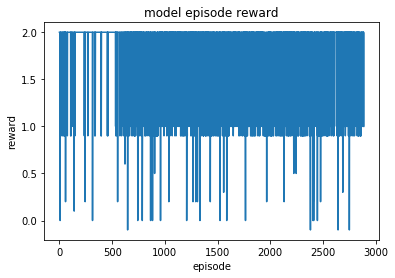

In [0]:
print(h_train.history.keys())
print_rewards(h_train)

Se observan las recompenzas obtenidas por el agente en cada episodio.

# Test!

Se prueba 50 veces el agente en el mismo environment para probar que tan bueno es y se muestra en una gráfica su recompenza obtenida durante estos 50 episodios.

In [0]:
h_test = dqn.test(env, nb_episodes=50, visualize=False)

Testing for 50 episodes ...
Episode 1: reward: 2.000, steps: 30
Episode 2: reward: 2.000, steps: 30
Episode 3: reward: 2.000, steps: 30
Episode 4: reward: 2.000, steps: 30
Episode 5: reward: 2.000, steps: 30
Episode 6: reward: 2.000, steps: 30
Episode 7: reward: 2.000, steps: 30
Episode 8: reward: 2.000, steps: 30
Episode 9: reward: 2.000, steps: 30
Episode 10: reward: 2.000, steps: 30
Episode 11: reward: 2.000, steps: 30
Episode 12: reward: 2.000, steps: 30
Episode 13: reward: 2.000, steps: 30
Episode 14: reward: 2.000, steps: 30
Episode 15: reward: 2.000, steps: 30
Episode 16: reward: 2.000, steps: 30
Episode 17: reward: 2.000, steps: 30
Episode 18: reward: 2.000, steps: 30
Episode 19: reward: 2.000, steps: 30
Episode 20: reward: 2.000, steps: 30
Episode 21: reward: 2.000, steps: 30
Episode 22: reward: 2.000, steps: 30
Episode 23: reward: 2.000, steps: 30
Episode 24: reward: 2.000, steps: 30
Episode 25: reward: 2.000, steps: 30
Episode 26: reward: 2.000, steps: 30
Episode 27: reward:

Como bien dice el paper, se obtiene 0.1 puntos cada vez que se llega a un "checkpoint" (mientras mas se acerca el jugador al area rival) y 1 punto por cada gol. La máxima recompenza obtenible por el agente durante un episodio es de 2.

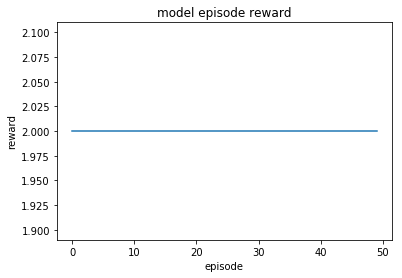

In [0]:
print_rewards(h_test)